# Aviation Risk Analysis

**Author**: Endalkachew Dessalegne

   ![img](./images/image-aircraft1.jpg),

## Overview
The company is planning to expand to the aviation industry by purchasing and operating airplanes for commercial and private enterprises. This project uses descriptive statistical analysis on aviation accident data from Kaggle to gain insight into which aircraft is with the lowest risk. It analyzes aviation accidents data to find out the potential risks of purchasing different aircrafts and recommend which aircraft to purchase. This require insight into which types of aircrafts are with the lowest risk. That is by analyzing how make and model of aircrafts, number and type of engines relate to accidents and injuries and damages caused by aircraft accidents which occurred within the United States, its territories and possessions, and in international waters. The data analysis generally shows that as aircraft's number of engines increases the number of accidents and injuries and damages decreases. It also shows that aircrafts with certain types of engine type are more involved in accidents than the others. This engine types includes Reciprocating engine. Moreover, some aircraft Make such as Cessna and its Models 172 and 152 are shown to be involved in accidents more than others. The data analysis also shows that how combination of different factors affects risk of accidents. My recommendation for which type of aircraft to purchase would be to focus on the number and type of engines of the aircrafts. To avoid aircraft-Make such as Cessna and choosing any other Make and Model should mainly focus on the type and number of engines.

## Business Problem

The company wants to expand into the aviation industry and wants to purchase aircrafts with the lowest risk in order to maximize profit. To determine this, aviation accident dataset was analyzed to find out which factors decrease the risk of aviation accidents so as to gain an insight to which type of aircraft to purchase for the company to minimize risk and maximize profit.

## Data Understanding

The data analyzed came from The NTSB aviation accident database from on Kaggle website. It contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters. I used one file to get an insight on how aircraft Make and Model, and number and type of engine correlates with number of accidents, fatal and serious injuries and damage to aircraft.

In [561]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [562]:
#store the data in a variable aaviation_df
aviation_df = pd.read_csv('data/AviationData.csv', encoding='latin-1', low_memory=False)

In [563]:
# view the first five rows
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [479]:
# summary of the data 
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [480]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


***
* The data represents aviation acccidents from 1962 and consists of aircraft categories, 
  make, model, number and type of engines of aircrafts involved in the acccidents.
* It consists of 88,889 entries or rows and 31 columns or variables
* It consists of injuries and damages levels caused by the accidents in different columns.
* The variables such as make and model of aircrafts and type and number of engines of aircraf in relation to the injuries and
  damages will be analyzed. 
***



## Data Preparation
## Data Cleaning

In [481]:
# Make column names easier to use 
aviation_df.columns = aviation_df.columns.str.lower().str.replace('.', '_')

In [482]:
aviation_df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

### Drop columns

The dataset consists of columns with a lot of missing values and which are less valueable in this analysis.
 

In [483]:
# Drop unnecessary columns
aviation_df = aviation_df.drop(['event_id', 'accident_number', 'location', 'air_carrier', 'latitude', 'longitude', 'airport_code', 'airport_name', 'registration_number',\
                                        'far_description', 'schedule', 'air_carrier', 'report_status', 'publication_date'], axis=1)

In [484]:
aviation_df.head()

,investigation_type,event_date,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
0,Accident,1948-10-24,United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [485]:
aviation_df.isnull().sum()

investigation_type            0
event_date                    0
country                     226
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7077
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
dtype: int64

## Dealing with missing values

* I checked columns for proportion of missing values and value counts of each unique value to decide on missing values.


In [486]:
"""
* I checked columns for proportion of missing values and value counts of each unique value to decide on missing values.
* Some columns are missing insignicant number of values, dropping this missing values will not affect the dataset.
"""
#code to drop value missing row
aviation_df = aviation_df.dropna(subset=['country', 'injury_severity', 'aircraft_damage','make', 'model','amateur_built'])

In [487]:
aviation_df.isnull().sum()

investigation_type            0
event_date                    0
country                       0
injury_severity               0
aircraft_damage               0
aircraft_category         54522
make                          0
model                         0
amateur_built                 0
number_of_engines          4451
engine_type                5343
purpose_of_flight          4032
total_fatal_injuries      10843
total_serious_injuries    12089
total_minor_injuries      11377
total_uninjured            5737
weather_condition          2825
broad_phase_of_flight     24822
dtype: int64


**I replace missing values in categorical data columns with the most common values or with 'Unknown'**

I go through the `value_counts` of unique values of each column and decide how to deal with missing values.

I dropped aircraft_catrgory column since it conists more than 64 percent of missing values.


In [488]:
#drop aircraft column
aviation_df = aviation_df.drop('aircraft_category', axis=1)

***
Now I deal with numerical columns with missing values

Replace missing values, in the columns with float datatype, with the **median** values 
***

In [489]:
aviation_df['number_of_engines'].value_counts()

1.0    68973
2.0     9690
0.0     1088
3.0      321
4.0      304
8.0        2
6.0        1
Name: number_of_engines, dtype: int64

In [490]:
# replace the NaN values with the most common value 1.0 
aviation_df['number_of_engines'] = aviation_df['number_of_engines'].fillna(1.0)

# Engine number is not going to be used in numerical equations rather considered as a category
#The nmber_of_engines column must be changed it to string type insted (first it is changed in to intiger to remove decimals)

aviation_df['number_of_engines'] = aviation_df['number_of_engines'].astype(int).astype(str)

In [491]:
# Code to repalce values with median value
aviation_df = aviation_df.fillna(aviation_df.median())

In [492]:
aviation_df.isnull().sum()

investigation_type            0
event_date                    0
country                       0
injury_severity               0
aircraft_damage               0
make                          0
model                         0
amateur_built                 0
number_of_engines             0
engine_type                5343
purpose_of_flight          4032
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition          2825
broad_phase_of_flight     24822
dtype: int64

In [495]:
#value counts for engine type
aviation_df['engine_type'].value_counts()

Reciprocating      74360
Turbo_Shaft         3433
Turbo_Prop          3123
Unknown             1821
Turbo_Fan           1547
Turbo_Jet            535
Electric               8
Hybrid_Rocket          1
Geared_Turbofan        1
Lr                     1
Name: engine_type, dtype: int64

In [494]:
#Column -'engine_type'
#replace 'UNK' category to 'Unknown'
aviation_df['engine_type'].replace(['None', 'NONE', 'UNK'], 'Unknown', inplace=True)

#strip and replace unwanted characters for consistancy
aviation_df['engine_type'] = aviation_df['engine_type'].str.title().str.replace(' ', '_')

#code to fill in with the most common value - 'Reciprocating'
aviation_df['engine_type'] = aviation_df['engine_type'].fillna('Reciprocating')


In [496]:
#value counts for purpose of flight
aviation_df['purpose_of_flight'].value_counts()

Personal                     48975
Instructional                10506
Unknown                       5861
Aerial Application            4695
Business                      3908
Positioning                   1584
Other Work Use                1203
Ferry                          801
Aerial Observation             766
Public Aircraft                705
Executive/corporate            518
Flight Test                    391
Skydiving                      178
External Load                  115
Public Aircraft - Federal      102
Banner Tow                     101
Air Race show                   90
Public Aircraft - Local         70
Public Aircraft - State         60
Air Race/show                   56
Glider Tow                      53
Firefighting                    38
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: purpose_of_flight, dtype: int64

In [497]:
#strip and replace 
aviation_df['purpose_of_flight'] = aviation_df['purpose_of_flight'].str.strip().str.replace('/','_').str.replace(' - ','_').str.replace(' ', '_')

In [498]:
#Column_name : 'Purpose of flight'
#code to fill in with value - 'Unknown' 
aviation_df['purpose_of_flight'] = aviation_df['purpose_of_flight'].fillna('Unknown')

In [499]:
#value counts for weather_condtion
aviation_df['weather_condition'].value_counts()

VMC    75291
IMC     5736
UNK      784
Unk      194
Name: weather_condition, dtype: int64

In [500]:
#Column_name : 'Weather Condition'
#code to fill in with common value 'VMC' 
#Unk and UNK must be formated the to represent the same value - Unknown
aviation_df['weather_condition'] = aviation_df['weather_condition'].str.strip().str.upper()
aviation_df['weather_condition'] = aviation_df['weather_condition'].fillna('VMC')

In [501]:
#value counts for broad_phase_of_flight
aviation_df['broad_phase_of_flight'].value_counts()

Landing        15147
Takeoff        12288
Cruise          9886
Maneuvering     8073
Approach        6406
Climb           1903
Taxi            1853
Descent         1712
Go-around       1344
Standing         745
Unknown          538
Other            113
Name: broad_phase_of_flight, dtype: int64

In [502]:
#Column_name : 'broad_phase_of_flight'
#code to fill in with common value 'Unknown'
aviation_df['broad_phase_of_flight'] = aviation_df['broad_phase_of_flight'].fillna('Unknown')

In [503]:
#strip and replace categorical value strings which is not in consistent formating
aviation_df['make'] = aviation_df['make'].str.strip().str.lower().str.replace(' ', '_')
aviation_df['model'] = aviation_df['model'].str.strip().str.lower().str.replace(' ', '_')



* **Fom the 'event_date' column, I extract 'event_year' to a new column which later be used to see the trend in accients over the years.** 

In [504]:
# the event_date column changed to datetime format first
aviation_df['event_date'] = pd.to_datetime(aviation_df['event_date'])

# extract the year from the event_date
aviation_df['event_year'] = aviation_df['event_date'].dt.year.astype(str)

***
* I, once again, check for missing values.
***

In [505]:
aviation_df.isnull().sum()

investigation_type        0
event_date                0
country                   0
injury_severity           0
aircraft_damage           0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
event_year                0
dtype: int64



Now, I add new column of 'total_injuries' putting together 'total_fatal_injuries' and 'total_serious_injuries' and excluding total_minor injuries because of their relative importance.


In [506]:
# create new column 'total_injuries'
aviation_df['total_injuries'] = aviation_df['total_fatal_injuries'] + aviation_df['total_serious_injuries']

In [507]:
cleaned_aviation_df = aviation_df

In [508]:
# Save cleaned dataset as csv
cleaned_aviation_df.to_csv('./data/cleaned_aviation_df.csv')

## Data Analysis

In [509]:
# get summary statistics
cleaned_aviation_df.describe()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,total_injuries
count,84830.000000,84830.000000,84830.000000,84830.000000,84830.000000
mean,0.569457,0.233325,0.302322,3.280019,0.802782
std,4.909513,1.399208,2.082244,20.318758,5.263598
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,1.000000
max,295.000000,161.000000,380.000000,699.000000,295.000000


### Accidents over the years
First, I check the trend of aircraft accidents over the years

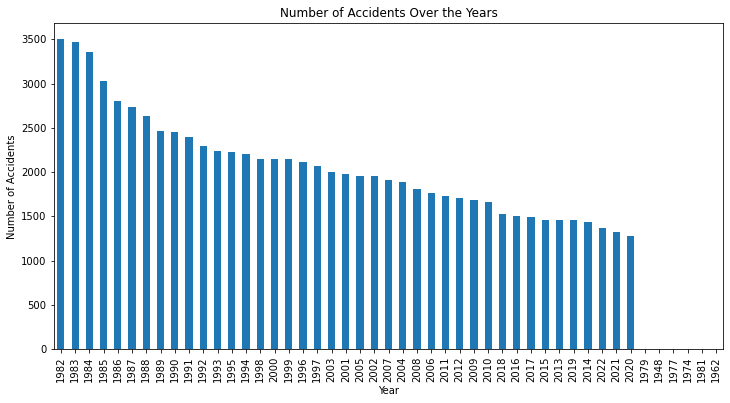

In [510]:
yearly_data = cleaned_aviation_df['event_year'].value_counts()

# Create plot
plt.figure(figsize=(12, 6))
yearly_data.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over the Years')
plt.show()

* The number of accidents and incidents decreased significantly over the the years.

## Aircraft Engine type and number

This analysis tries to find out how aircrats number and tyepes of engines are related to the number

of accidents and to the level of injuries and damge to aircraft 

I use the value counts of some of the main variables for vizualization of which ones involved more in accidents


### Engine Type
#### Number of accidents by Engine Types

I find out how the rumber of accidents relate to engine type of aircrafts

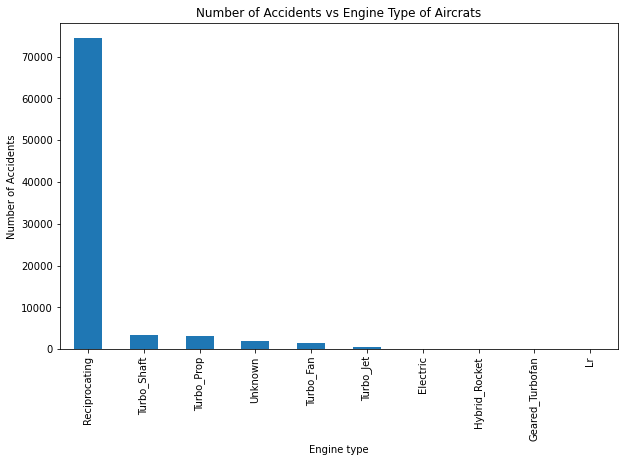

In [511]:
#Type of engine
# used .value_counts() to count the number of accidents
engines_type_data = cleaned_aviation_df['engine_type'].value_counts()

# Create plot
plt.figure(figsize=(10, 6))
engines_type_data.plot(kind='bar')
plt.xlabel('Engine type')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents vs Engine Type of Aircrats')
plt.show()


### Number of Engines
#### Number of accidents by Engine Types

I find out how the rumber of accidents relate to number of engines of aircrafts


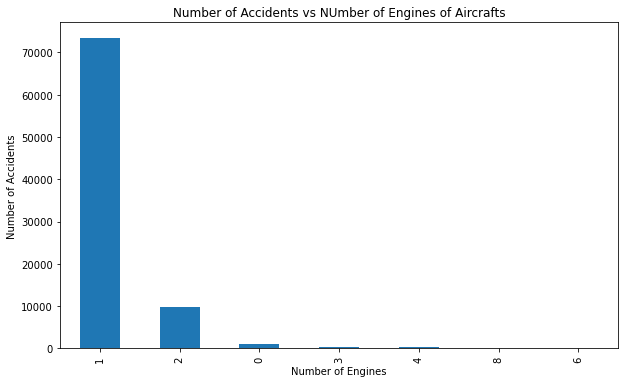

In [514]:
#Number of engines
# used .value_counts() to count the number of accidents
engines_num_data = cleaned_aviation_df['number_of_engines'].value_counts()

# Create plot
plt.figure(figsize=(10, 6))
engines_num_data.plot(kind='bar')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents vs NUmber of Engines of Aircrafts')
plt.show()


* As engine number of aircrafts have increases the number of accidents decreases. 
* Aircrafts with some engine types such as Reciprocating are involved in the highest number of accidents.
  

### Number of Engines and Engine Types
#### `Total injuries` by `Number of Engines` and `Engine Types`
I find out how the rumber of accidents/total injuries relate to combination of the two factors

In [532]:
# groupby 'engine_type' and 'number of engines' and aggregate them to get 'total-injuries'
grouped_by_type_num_engine = cleaned_aviation_df.groupby(by=['number_of_engines', 'engine_type'])[['total_injuries']].agg(len)
grouped_by_type_num_engine

total_injuries
number_of_engines engine_type                    
0                 Reciprocating             468.0
                  Unknown                   620.0
1                 Electric                    5.0
                  Hybrid_Rocket               1.0
                  Reciprocating           67566.0
                  Turbo_Fan                  74.0
                  Turbo_Jet                 106.0
                  Turbo_Prop               1515.0
                  Turbo_Shaft              2971.0
                  Unknown                  1186.0
2                 Geared_Turbofan             1.0
                  Reciprocating            6238.0
                  Turbo_Fan                1073.0
                  Turbo_Jet                 330.0
                  Turbo_Prop               1576.0
                  Turbo_Shaft               461.0
                  Unknown                    11.0
3                 Reciprocating              15.0
                  Turbo_Fan                 238.0
                  Turbo_Jet                  67.0
                  Turbo_Shaft                 1.0
4                 Electric                    2.0
                  Reciprocating              72.0
                  Turbo_Fan                 162.0
                  Turbo_Jet                  32.0
                  Turbo_Prop                 32.0
                  Unknown                     4.0
6                 Reciprocating               1.0
8                 Electric                    1.0
                  Lr                          1.0

* Aircrafts with certain engine types are more involved in accidents than the others. This mainly refers to engine type `Reciprocating` 
* It also shows that as the number of engines the aircrafts have increases the number of accidents and dncreases.
* Aircrafts with a combination of 1 engine and of `Reciprocating` type are highly involved in accidents with large number of injuries than the other combinations